<a href="https://colab.research.google.com/github/slashssab/piecewise-smooth-ode/blob/main/pwsode_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repetition

In a [previous example](https://colab.research.google.com/drive/1kvWjhT8AnLEWmgKVs1o1Fhcsp4x_gXtt) we have simulated a basic symetric Hamiltionial system. However, we didn't use a differential part of the system $\rightarrow C = 0$. This parameter gives the system a lot o properties to be analyzed and decidedly changes its behaviour. Let us recall system from the provious example.

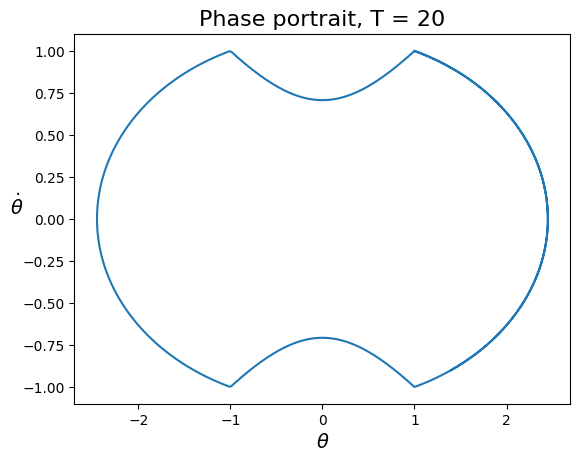

In [ ]:
import numpy as np
from scipy.integrate import odeint

# Defining variables and Jacobians L1 and L2.
A = 0.5
B = -0.7
C = 0

L1 = np.array([[0,1],[A, 0]])
L2 = np.array([[0,1],[A + B , C]])

# Defining function of the analyzed system.
def func(y, t, Ain, Aout, theta_0):
    if abs(y[0])>theta_0:
        return np.dot(Aout,y)
    else:
        return np.dot(Ain,y)

# Set up a simulation properties and initial value provlem.
ivp = np.array([1,1])
theta_0 = 1
T = 20
N = 1000
tspan = np.linspace(0, T, N)

# Run the simulation
args = (L1,L2,theta_0)
y = odeint(func,ivp,tspan,args=args)

# Pront phase portrait of the simulation
from matplotlib import pyplot
pyplot.title('Phase portrait, T = {0}'.format(T), fontsize=16)
pyplot.xlabel(r'$\theta$', fontsize=14)
pyplot.ylabel(r'$\dot{\theta}$', rotation = 0, fontsize=14)
pyplot.plot(y[:,0], y[:,1])
pyplot.show()

# Stability examination

At this moment let us examine impact of the differentiation term in a system by setting parameter $C \ne 0$. We start the consideration with $C = 0.1$

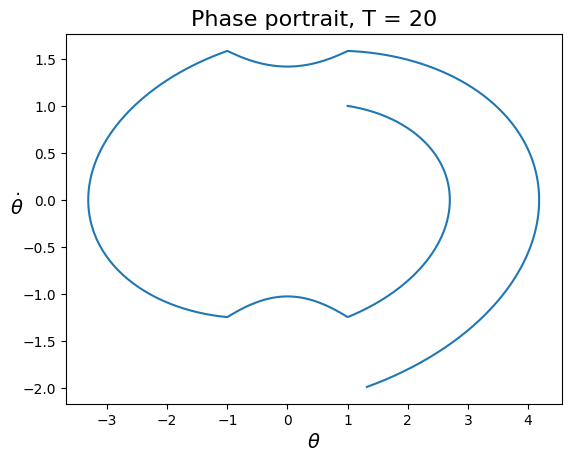

In [12]:
C = 0.1

# Rebuild jacobian L2.
L2 = np.array([[0,1],[A + B , C]])

# Apply new jacobian to the function and run new simulation.
args = (L1,L2,theta_0)
y = odeint(func,ivp,tspan,args=args)

from matplotlib import pyplot
pyplot.title('Phase portrait, T = {0}'.format(T), fontsize=16)
pyplot.xlabel(r'$\theta$', fontsize=14)
pyplot.ylabel(r'$\dot{\theta}$', rotation = 0, fontsize=14)
pyplot.plot(y[:,0], y[:,1])
pyplot.show()

We can see that system has lost its stability. Now we can check the opposite example setting $C = -0.1$

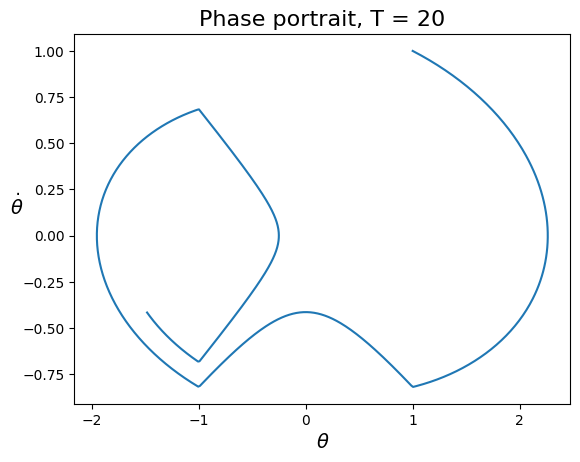

In [17]:
C = -0.1

L2 = np.array([[0,1],[A + B , C]])

args = (L1,L2,theta_0)
y = odeint(func,ivp,tspan,args=args)

from matplotlib import pyplot
pyplot.title('Phase portrait, T = {0}'.format(T), fontsize=16)
pyplot.xlabel(r'$\theta$', fontsize=14)
pyplot.ylabel(r'$\dot{\theta}$', rotation = 0, fontsize=14)
pyplot.plot(y[:,0], y[:,1])
pyplot.show()

Now we notice that system attracts to the one side of the $\theta$ axis, but we do not know what is the final attraction form. Before we examine this example we will wrap entire simulation in a separate method, so we can run simulation neater.

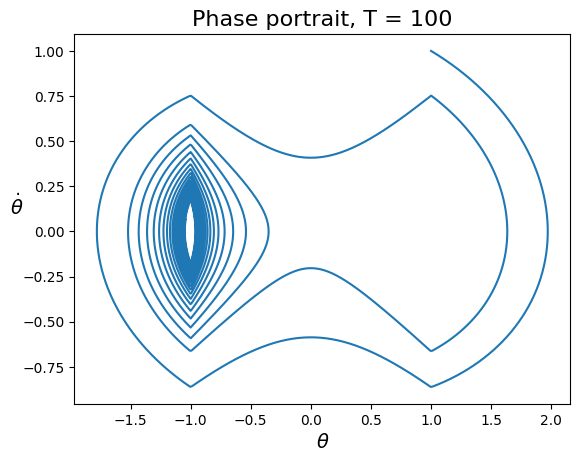

In [42]:
def run_simulation(A, B, C, T, N, func, ivp, theta_0):
  # Set up a simulation properties and initial value provlem.
  tspan = np.linspace(0, T, N)
  L1 = np.array([[0,1],[A, 0]])
  L2 = np.array([[0,1],[A + B , C]])

  # Run the simulation
  args = (L1,L2,theta_0)
  y = odeint(func,ivp,tspan,args=args)

  # Pront phase portrait of the simulation
  from matplotlib import pyplot
  pyplot.title('Phase portrait, T = {0}'.format(T), fontsize=16)
  pyplot.xlabel(r'$\theta$', fontsize=14)
  pyplot.ylabel(r'$\dot{\theta}$', rotation = 0, fontsize=14)
  pyplot.plot(y[:,0], y[:,1])
  pyplot.show()


Having a simulation method work done we can easly explore different set of papameters. By looking at the phase portrait graph we can assume that the limit behaviou of the system is the attraction to the on of the center points $[-1, 0]$ or $[1, 0]$.

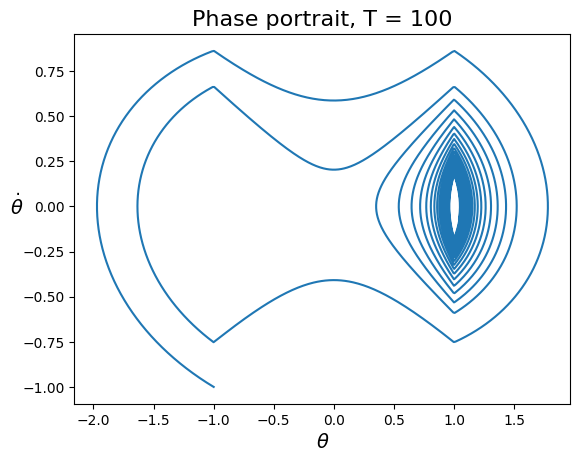

In [44]:
C = -0.1
T = 100
N = 5000
ivp = np.array([-1,-1])
run_simulation(A, B, C, T, N, func, ivp, theta_0)

# Conclusions

In this chapter we have examined a basic properties of the system depending on the differentiation term $C$. Stability of the system is conditioned by the sign of the parameter $C$, system is unstable and expands infinitly when $C>0$, for $C<0$ system shows a limit behaviour and attracts to the one of the center points $[-1,0]$ or $[1,0]$ and for $C=0$ system is a periodic orbit of the Hamiltonian system.